<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [9]:
! pip install --ignore-installed wrapt

! pip install tensorflow

distutils: /Users/uchino/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /Users/uchino/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
  Using cached wrapt-1.12.1-py3-none-any.whl
distutils: /Users/uchino/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /Users/uchino/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /Users/uchino/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /Users/uchino/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
  Using cached tensorflow-2.4.1-cp37-cp37m-macosx_10_11_x86_64.whl (173.9 MB)
  Using cached h5py-2.10.0-cp37-cp37m-macosx_10_6_intel.whl (3.0 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [10]:
# insert code here

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.4.1


In [11]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [12]:
# insert code here
diabetes = load_diabetes()

In [13]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Prepare input data

In [14]:
# insert code here
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [15]:
# How many observations are in y?
len(y)

442

### Split the data (training/test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [18]:
# Set up the model architecture
model = Sequential()

In [19]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [21]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [22]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [23]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

CPU times: user 1min 47s, sys: 13.3 s, total: 2min 1s
Wall time: 1min 38s


### Create predictions

In [24]:
predictions = model.predict(X_test)

### Evaluate the model

In [25]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 1ms/step - loss: 3305.7957 - mse: 3305.7957

Test loss: 3305.795654


In [26]:
score

[3305.795654296875, 3305.795654296875]

In [27]:
# Find RMSE
score[0] ** (1/2)

57.4960490320585

In [28]:
y.mean()

152.13348416289594

In [29]:
y.std()

77.00574586945044

In [30]:
y.min()

25.0

In [31]:
y.max()

346.0

### Visualisation of cost

In [32]:
history.history

{'loss': [28739.419921875,
  28715.576171875,
  28681.595703125,
  28626.501953125,
  28540.6171875,
  28422.55859375,
  28256.892578125,
  28034.716796875,
  27749.173828125,
  27395.720703125,
  26971.5,
  26475.7421875,
  25888.294921875,
  25236.27734375,
  24496.005859375,
  23676.177734375,
  22742.19140625,
  21721.7578125,
  20641.65234375,
  19447.234375,
  18244.044921875,
  17035.216796875,
  15795.767578125,
  14509.546875,
  13261.908203125,
  12086.28125,
  11018.6474609375,
  10012.255859375,
  9096.2724609375,
  8301.5439453125,
  7546.4033203125,
  6925.75,
  6360.85107421875,
  5894.2548828125,
  5536.04931640625,
  5269.4345703125,
  5040.787109375,
  4869.81396484375,
  4739.9951171875,
  4632.6279296875,
  4540.5068359375,
  4457.29248046875,
  4401.4375,
  4344.74609375,
  4303.67236328125,
  4267.3857421875,
  4241.27880859375,
  4212.27001953125,
  4178.2734375,
  4147.458984375,
  4125.71044921875,
  4099.73828125,
  4078.442138671875,
  4055.502685546875,
  40

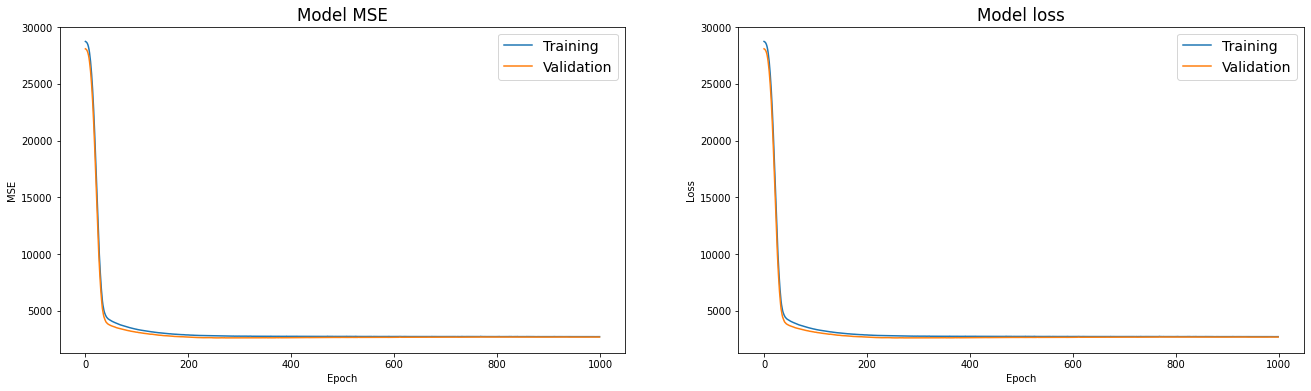

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [34]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

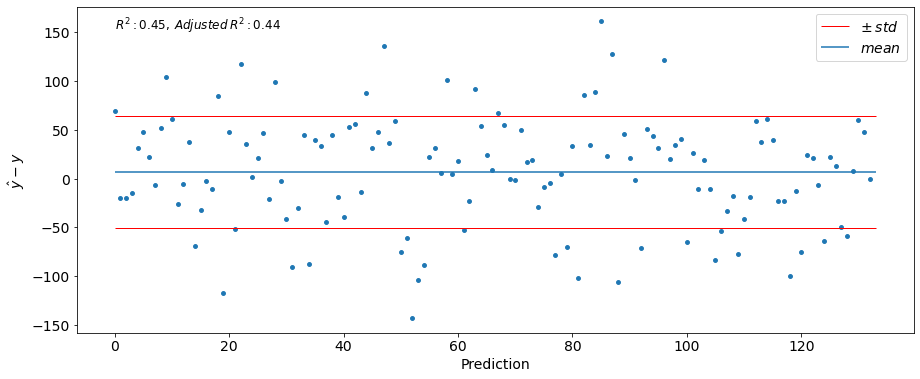

In [35]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



